# Sentiment Analysis of Social Media Data

### Performing Text Classification on the tweet data about COVID19. The tweets have been pulled from Twitter and manual tagging has been done then. 
### Process

### Removing punctuations, stopwords and any words of length 1 or 2 if needed.
### Getting the wordcloud of the relevant words before and after cleaning.

### TF-IDF along with Random Forest Classifier were used to build a Tweet Sentiment classification Model.


### Columns:
#### 1) Location
#### 2) Tweet At
#### 3) Original Tweet
#### 4) Sentiment (To be predicted)

In [3]:
import pandas as pd

df = pd.read_csv("C:/DOCUMENTS/LANGARA/3rd SEM/CPSC/Mid Term 1/Tweets_Corona_NLP.csv",encoding='ISO-8859-1')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


# Data Cleaning

In [5]:
import nltk
from nltk.corpus import stopwords
import re

# Downloading stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# cleaning function
def clean_text(text):
    # To remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Converting to lowercase
    text = text.lower()
    # Removing stopwords and short words
    text = ' '.join([word for word in text.split() if word not in stop_words and len(word) > 2])
    return text

df['cleaned_tweet'] = df['OriginalTweet'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tesha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Visualizing Word Cloud

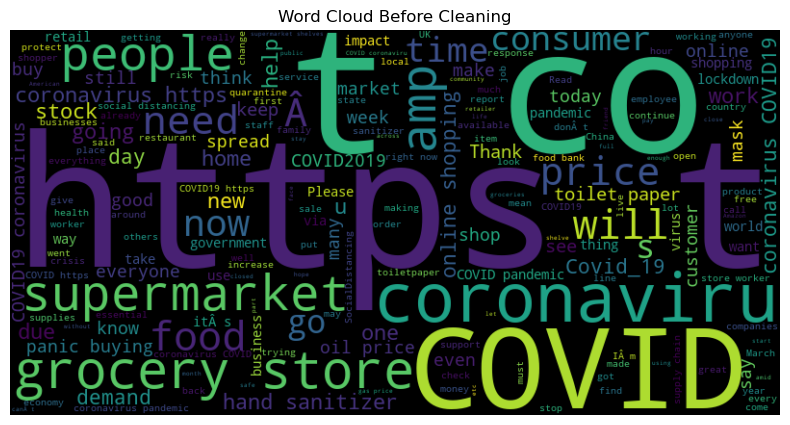

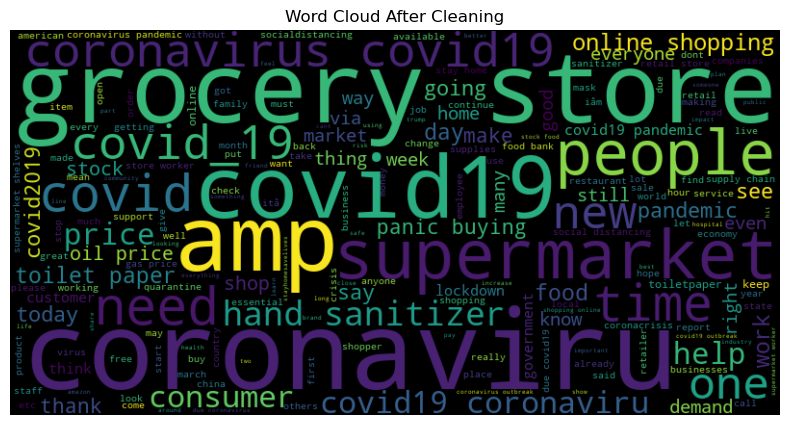

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word Cloud before cleaning
text_before = ' '.join(df['OriginalTweet'].tolist())
wordcloud_before = WordCloud(width=800, height=400).generate(text_before)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Before Cleaning")
plt.show()

# Word Cloud after cleaning
text_after = ' '.join(df['cleaned_tweet'].tolist())
wordcloud_after = WordCloud(width=800, height=400).generate(text_after)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_after, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud After Cleaning")
plt.show()


# Building the Sentiment Classification Model

### A model with the cleaned_tweet as the predictor

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Vectorize the text data
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_tweet']).toarray()

y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initializing
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


                    precision    recall  f1-score   support

Extremely Negative       0.60      0.52      0.56      1645
Extremely Positive       0.59      0.53      0.56      1987
          Negative       0.48      0.44      0.46      2975
           Neutral       0.53      0.73      0.62      2314
          Positive       0.50      0.47      0.49      3427

          accuracy                           0.53     12348
         macro avg       0.54      0.54      0.54     12348
      weighted avg       0.53      0.53      0.52     12348

[[ 859   49  483  127  127]
 [  30 1056  121   97  683]
 [ 412  121 1305  629  508]
 [  27   45  266 1690  286]
 [ 115  532  525  637 1618]]


### A model with the month of the tweet and the cleaned_tweet

In [14]:
import numpy as np

# Converting 'Tweet At' to datetime format
df['TweetAt'] = pd.to_datetime(df['TweetAt'], format='%d-%m-%Y')

# Extracting the month
df['Month'] = df['TweetAt'].dt.month

month_dummies = pd.get_dummies(df['Month'], prefix='Month', drop_first=True)

X_combined = np.hstack([X, month_dummies])  # Combine TF-IDF features 



In [15]:
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42, stratify=y)

# Initializing
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                    precision    recall  f1-score   support

Extremely Negative       0.61      0.52      0.56      1645
Extremely Positive       0.58      0.52      0.55      1987
          Negative       0.47      0.43      0.45      2975
           Neutral       0.52      0.72      0.60      2314
          Positive       0.49      0.47      0.48      3427

          accuracy                           0.52     12348
         macro avg       0.53      0.53      0.53     12348
      weighted avg       0.52      0.52      0.52     12348

[[ 851   42  473  127  152]
 [  25 1031  124  111  696]
 [ 397  127 1277  628  546]
 [  26   52  278 1658  300]
 [ 107  526  537  652 1605]]


The model with the cleaned_tweet as the predictor has a better precision and recall